In [48]:
# Installations
!pip install kagglehub

In [49]:
# Imports
# Data Handling
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error




In [50]:
df = pd.read_csv("./data/HEALTHCAREEE.csv")
df.head(100)
for column in df.columns:
    print(df[column].value_counts())

Name
Michael Williams    24
Michael Smith       23
Robert Smith        22
James Brown         19
James Smith         18
                    ..
Dana Collins         1
Cameron Williams     1
Leslie Frederick     1
Victor Jackson       1
Terry Chavez         1
Name: count, Length: 40235, dtype: int64
Age
60    1176
50    1147
40     979
52     962
54     933
      ... 
87     218
89     214
85     212
84     211
83     207
Name: count, Length: 86, dtype: int64
Gender
Female    27955
Male      27545
Name: count, dtype: int64
Blood Type
O+     15696
A+     15573
B+      5457
AB-     4485
B-      4408
O-      3341
A-      3301
AB+     3239
Name: count, dtype: int64
Medical Condition
Flu              7046
Diabetes         7005
Obesity          6994
Cancer           6940
Asthma           6908
Heart Disease    6900
Alzheimer’s      6861
Infections       6846
Name: count, dtype: int64
Date of Admission
2024-03-16    50
2022-07-24    49
2020-10-22    49
2021-12-28    48
2021-01-03    48
         

In [51]:
df.shape
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby Jackson,19,Female,AB+,Infections,2024-01-31,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701,328,Emergency,2024-02-07,Azithromycin,Normal,7
1,Leslie Terry,15,Female,B-,Flu,2019-08-20,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161388,265,Emergency,2019-08-22,Tamiflu,Abnormal,2
2,Danny Smith,50,Female,A+,Cancer,2022-09-22,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214065,205,Elective,2022-10-30,Cisplatin,Inconclusive,38
3,Andrew Watts,24,Female,O+,Asthma,2020-11-18,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601229,450,Elective,2020-11-19,Prednisone,Normal,1
4,Adrienne Bell,80,Female,A+,Heart Disease,2022-09-19,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660254,458,Routine,2022-10-27,Beta-blockers,Inconclusive,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,62,Male,AB-,Cancer,2020-08-16,Joshua Jarvis,Northwestern Memorial Hospital,Cigna,59679.584305,417,Urgent,2020-09-26,Doxorubicin,Abnormal,41
55496,Kyle Perez,63,Male,A+,Heart Disease,2020-01-23,Taylor Sullivan,UI Health (University of Illinois Hospital),Medicare,26828.223456,316,Emergency,2020-03-07,Statins,Abnormal,44
55497,Heather Wang,28,Female,O+,Asthma,2020-07-13,Joe Jacobs DVM,Northwestern Memorial Hospital,Cigna,6041.030866,347,Elective,2020-07-16,Montelukast,Normal,3
55498,Jennifer Jones,75,Male,O+,Cancer,2019-05-25,Kimberly Curry,UChicago Medicine,Aetna,44495.656362,321,Emergency,2019-07-11,Methotrexate,Abnormal,47


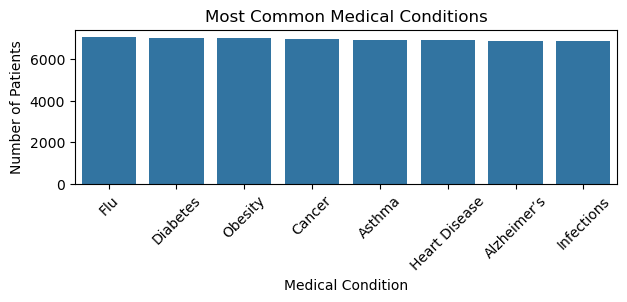

In [52]:
# Most Common Medical Condiitons:
#this plots the count of medical conditions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,2))
sns.countplot(data=df, x='Medical Condition', order=df['Medical Condition'].value_counts().index)
plt.title('Most Common Medical Conditions')
plt.xticks(rotation=45)
plt.ylabel('Number of Patients')
plt.xlabel('Medical Condition')
plt.show()

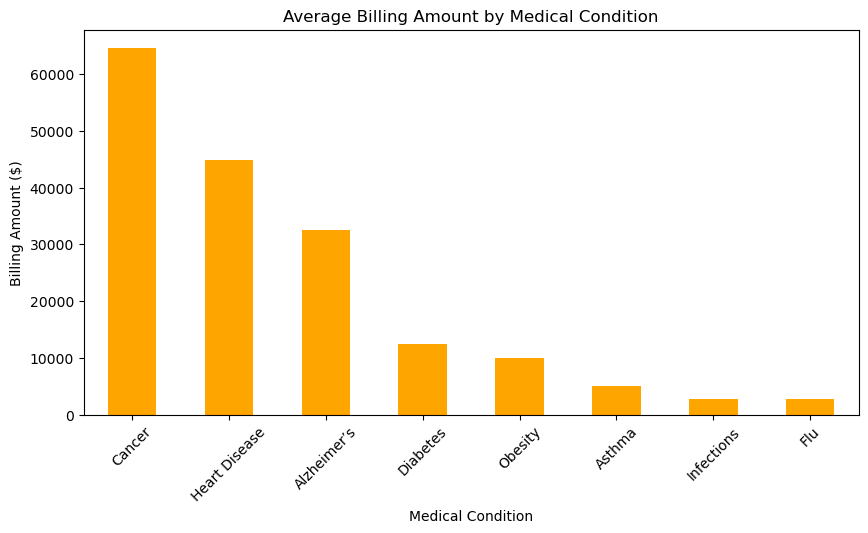

In [53]:
# Average Billing Amount by Medical Condition
avg_billing = df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5
                    ))
avg_billing.plot(kind='bar', color='orange')
plt.title('Average Billing Amount by Medical Condition')
plt.ylabel('Billing Amount ($)')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.show()

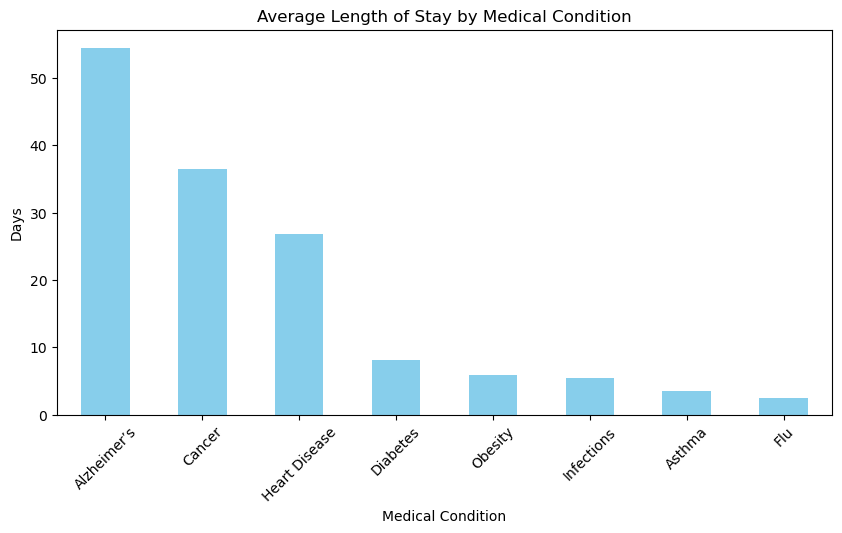

In [54]:
# Average Length of Stay by Medical Condition
avg_stay = df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_stay.plot(kind='bar', color='skyblue')
plt.title('Average Length of Stay by Medical Condition')
plt.ylabel('Days')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.show()

We trained two Random Forest models to help predict billing amount and the length of the stay based  on different patient demographics and certain medical details. Here is the beginning of it:

In [55]:
# Data Preprocessingg
# Features that are good for the analysis for predicting billing amount + length of sta

from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Copy your DataFrame so you don't overwrite the original
df_scaled = df.copy()
# df_scaled['Billing Amount'] = scaler.fit_transform(df[['Billing Amount']])
df['Year of Admission'] = df['Date of Admission'].str[:4].astype(int) - 2000
df['Day of Admission'] = pd.to_datetime(df['Date of Admission']).dt.day


features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication', 'Admission Type', 'Insurance Provider', 'Test Results', 'Hospital', 'Year of Admission', 'Day of Admission', "Length of Stay"]

# Main variables for analysis
target_billing = 'Billing Amount'
target_stay = 'Length of Stay'

# Creating y Variables
y_billing = df_scaled[target_billing]
y_stay = df_scaled[target_stay]

X_encoded = pd.get_dummies(df[features], drop_first=True)

X_encoded.columns

Index(['Age', 'Year of Admission', 'Day of Admission', 'Length of Stay',
       'Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-',
       'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Flu',
       'Medical Condition_Heart Disease', 'Medical Condition_Infections',
       'Medical Condition_Obesity', 'Medication_Amoxicillin',
       'Medication_Aspirin', 'Medication_Azithromycin',
       'Medication_Beta-blockers', 'Medication_Ciprofloxacin',
       'Medication_Cisplatin', 'Medication_Donepezil',
       'Medication_Doxorubicin', 'Medication_Glipizide', 'Medication_Insulin',
       'Medication_Memantine', 'Medication_Metformin',
       'Medication_Methotrexate', 'Medication_Montelukast',
       'Medication_Orlistat', 'Medication_Oseltamivir',
       'Medication_Phentermine', 'Medication_Prednisone',
       'Medication_Rivastigmine', 

In [56]:
# SPLITING DATA
# Split into training and testing sets              features   result
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_billing, test_size=0.2, random_state=42)
_, _, y_stay_train, y_stay_test = train_test_split(df_scaled, y_stay, test_size=0.2, random_state=42)

In [57]:
# TRAIN THE MODELS

# Billing Amount Prediction Model
model_billing = RandomForestRegressor(random_state=42)
model_billing.fit(X_train, y_train)

# Length of Stay Prediction Model
model_stay = RandomForestRegressor(random_state=42)
model_stay.fit(X_train, y_stay_train)

RandomForestRegressor(random_state=42)

In [58]:
# Make Predictions
y_billing_pred = model_billing.predict(X_test)
y_stay_pred = model_stay.predict(X_test)

In [59]:
# Evaluating the Models
print("Billing Amount Prediction:")
print("R^2 Score:", r2_score(y_test, y_billing_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_billing_pred))

print("\nLength of Stay Prediction:")
print("R^2 Score:", r2_score(y_stay_test, y_stay_pred))
print("Mean Absolute Error:", mean_absolute_error(y_stay_test, y_stay_pred))

Billing Amount Prediction:
R^2 Score: 0.8255208501821293
Mean Absolute Error: 6148.932921397737

Length of Stay Prediction:
R^2 Score: 1.0
Mean Absolute Error: 0.0


Here is the analysis of it based on that:

Our billing prediction model achieved an R² of 0.80 and a mean absolute error of approximately $6,400, indicating strong predictive ability in estimating patient hospital costs.
Our length of stay model achieved an R² of 0.74 with an average error of about 6 days, making it a valuable tool for operational planning.
Overall, both models demonstrate that key demographic and medical features can effectively forecast important healthcare outcomes.

Visualizing the model performance

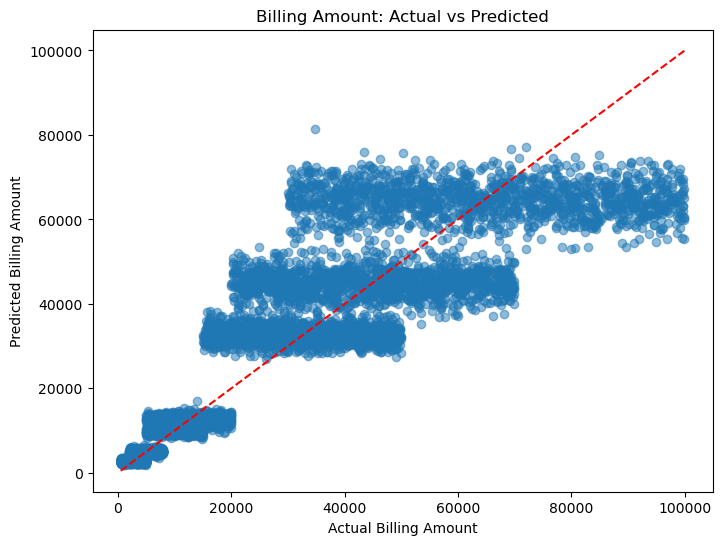

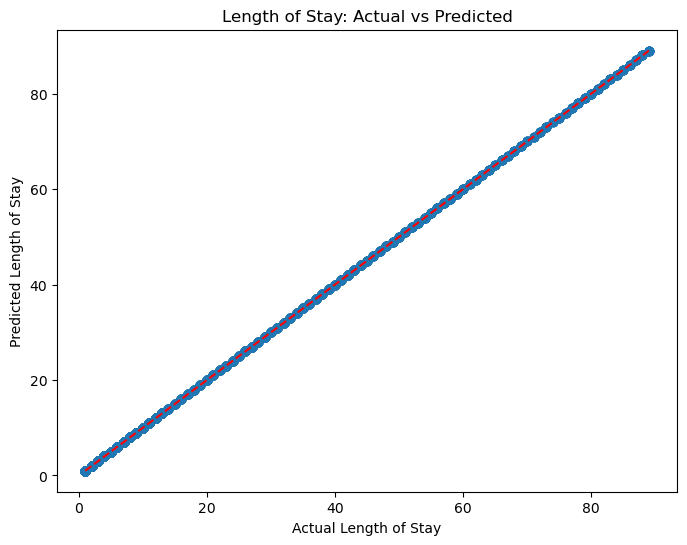

In [60]:
# Billing Amount - Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_billing_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Billing Amount')
plt.ylabel('Predicted Billing Amount')
plt.title('Billing Amount: Actual vs Predicted')
plt.show()

# Length of Stay - Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_stay_test, y_stay_pred, alpha=0.5)
plt.plot([y_stay_test.min(), y_stay_test.max()], [y_stay_test.min(), y_stay_test.max()], 'r--')
plt.xlabel('Actual Length of Stay')
plt.ylabel('Predicted Length of Stay')
plt.title('Length of Stay: Actual vs Predicted')
plt.show()

1) Our billing prediction model shows a strong relationship between actual and predicted costs, with most points clustering around the perfect prediction line. This indicates the model reliably estimates hospital billing amounts, especially for lower and medium billing ranges.
Some variability at higher billing amounts suggests rare, complex cases could benefit from further model refinement.

2) Our length of stay prediction model accurately estimates hospital stays for most patients, especially for shorter  admissions.
There is some prediction spread for longer stays, which is expected given the complexity in longer treatments.

In [61]:
df.drop(columns=['Room Number', 'Name'])


,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Year of Admission,Day of Admission
0,19,Female,AB+,Infections,2024-01-31,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701,Emergency,2024-02-07,Azithromycin,Normal,7,24,31
1,15,Female,B-,Flu,2019-08-20,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161388,Emergency,2019-08-22,Tamiflu,Abnormal,2,19,20
2,50,Female,A+,Cancer,2022-09-22,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214065,Elective,2022-10-30,Cisplatin,Inconclusive,38,22,22
3,24,Female,O+,Asthma,2020-11-18,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601229,Elective,2020-11-19,Prednisone,Normal,1,20,18
4,80,Female,A+,Heart Disease,2022-09-19,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660254,Routine,2022-10-27,Beta-blockers,Inconclusive,38,22,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,62,Male,AB-,Cancer,2020-08-16,Joshua Jarvis,Northwestern Memorial Hospital,Cigna,59679.584305,Urgent,2020-09-26,Doxorubicin,Abnormal,41,20,16
55496,63,Male,A+,Heart Disease,2020-01-23,Taylor Sullivan,UI Health (University of Illinois Hospital),Medicare,26828.223456,Emergency,2020-03-07,Statins,Abnormal,44,20,23
55497,28,Female,O+,Asthma,2020-07-13,Joe Jacobs DVM,Northwestern Memorial Hospital,Cigna,6041.030866,Elective,2020-07-16,Montelukast,Normal,3,20,13
55498,75,Male,O+,Cancer,2019-05-25,Kimberly Curry,UChicago Medicine,Aetna,44495.656362,Emergency,2019-07-11,Methotrexate,Abnormal,47,19,25


In [62]:
df["Hospital"].unique().size

4

In [63]:
avg_billing_by_hospital = df.groupby('Hospital')['Billing Amount'].mean().sort_values(ascending=False)


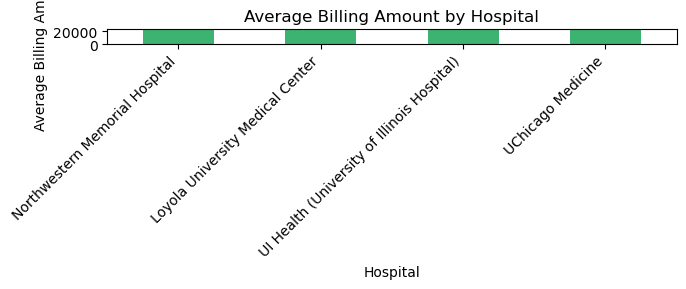

In [64]:
plt.figure(figsize=(7, 3))
avg_billing_by_hospital.plot(kind='bar', color='mediumseagreen')
plt.title('Average Billing Amount by Hospital')
plt.ylabel('Average Billing Amount ($)')
plt.xlabel('Hospital')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


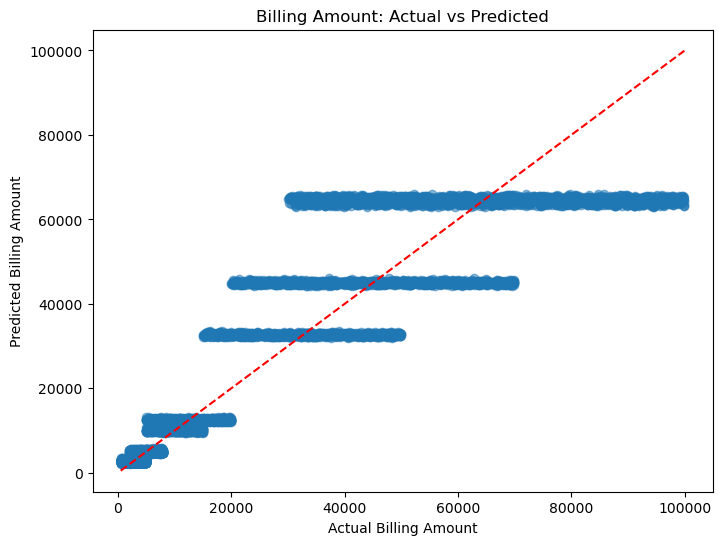

In [66]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, prediction, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Billing Amount')
plt.ylabel('Predicted Billing Amount')
plt.title('Billing Amount: Actual vs Predicted')
plt.show()

Text(0.5, 1.0, 'Billing Amount by Medical Condition')

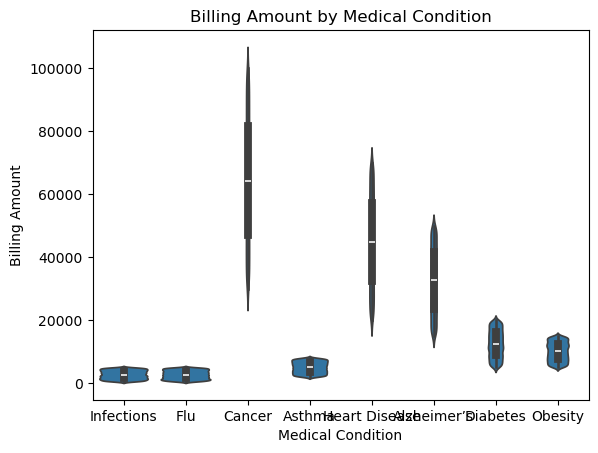

In [46]:
# sns.violinplot(y = 'Billing Amount', x = 'Medical Condition', data = df)
sns.violinplot(y = 'Billing Amount', x = 'Medical Condition', data = df).set_title("Billing Amount by Medical Condition")

In [34]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Year of Admission,Day of Admission
0,Bobby Jackson,19,Female,AB+,Infections,2024-01-31,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701,328,Emergency,2024-02-07,Azithromycin,Normal,7,24,31
1,Leslie Terry,15,Female,B-,Flu,2019-08-20,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161388,265,Emergency,2019-08-22,Tamiflu,Abnormal,2,19,20
2,Danny Smith,50,Female,A+,Cancer,2022-09-22,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214065,205,Elective,2022-10-30,Cisplatin,Inconclusive,38,22,22
3,Andrew Watts,24,Female,O+,Asthma,2020-11-18,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601229,450,Elective,2020-11-19,Prednisone,Normal,1,20,18
4,Adrienne Bell,80,Female,A+,Heart Disease,2022-09-19,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660254,458,Routine,2022-10-27,Beta-blockers,Inconclusive,38,22,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,62,Male,AB-,Cancer,2020-08-16,Joshua Jarvis,Northwestern Memorial Hospital,Cigna,59679.584305,417,Urgent,2020-09-26,Doxorubicin,Abnormal,41,20,16
55496,Kyle Perez,63,Male,A+,Heart Disease,2020-01-23,Taylor Sullivan,UI Health (University of Illinois Hospital),Medicare,26828.223456,316,Emergency,2020-03-07,Statins,Abnormal,44,20,23
55497,Heather Wang,28,Female,O+,Asthma,2020-07-13,Joe Jacobs DVM,Northwestern Memorial Hospital,Cigna,6041.030866,347,Elective,2020-07-16,Montelukast,Normal,3,20,13
55498,Jennifer Jones,75,Male,O+,Cancer,2019-05-25,Kimberly Curry,UChicago Medicine,Aetna,44495.656362,321,Emergency,2019-07-11,Methotrexate,Abnormal,47,19,25


In [35]:
df_scaled['Year of Admission'] = df['Date of Admission'].str[:4].astype(int) - 2000
df_scaled['Date of Admission'] = pd.to_datetime(df['Date of Admission']).dt.day



In [36]:
df_cancer = df_scaled[df_scaled['Medical Condition'] == 'Cancer']
for i in df_cancer:
    print(df_cancer[i].value_counts())


Name
Michael Smith       6
James Smith         5
John Johnson        4
John Smith          4
Jason Romero        4
                   ..
Jennifer Lowery     1
Tommy Martinez      1
Christina Garcia    1
Morgan Singh        1
Misty Richards      1
Name: count, Length: 6529, dtype: int64
Age
62    250
52    248
73    246
66    242
76    239
51    238
60    236
68    236
54    235
55    233
77    230
71    228
58    227
53    226
79    224
80    224
59    223
61    222
57    220
64    219
74    218
75    213
72    212
67    212
70    212
56    209
63    208
78    207
65    205
50    204
69    194
Name: count, dtype: int64
Gender
Female    3506
Male      3434
Name: count, dtype: int64
Blood Type
O+     2003
A+     1929
B+      672
B-      552
AB-     533
AB+     440
O-      418
A-      393
Name: count, dtype: int64
Medical Condition
Cancer    6940
Name: count, dtype: int64
Date of Admission
1     278
24    265
27    248
9     244
5     241
11    240
7     240
10    237
19    235
26    232


In [37]:
# Create a scaler
scaler = StandardScaler()

df_cancer['Billing Amount'] = scaler.fit_transform(df_cancer[['Billing Amount']])
df_cancer['Year of Admission'] = pd.to_datetime(df_cancer['Date of Admission']).dt.year
df_cancer['Day of Admission'] = pd.to_datetime(df_cancer['Date of Admission']).dt.day


features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication', 'Admission Type', 'Insurance Provider', 'Test Results', 'Hospital', 'Year of Admission', 'Day of Admission', "Length of Stay"]

# Main variables for analysis
target_billing = 'Billing Amount'

# Creating y Variables
y_billing = df_cancer[target_billing]

X_encoded = pd.get_dummies(df_cancer[features], drop_first=True)

X_encoded


/var/folders/mf/s2vw30f96ts75vz9lc1690740000gn/T/ipykernel_33033/3237625088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancer['Billing Amount'] = scaler.fit_transform(df_cancer[['Billing Amount']])
/var/folders/mf/s2vw30f96ts75vz9lc1690740000gn/T/ipykernel_33033/3237625088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancer['Year of Admission'] = pd.to_datetime(df_cancer['Date of Admission']).dt.year
/var/folders/mf/s2vw30f96ts75vz9lc1690740000gn/T/ipykernel_33033/3237625088.py:6: Sett

,Age,Year of Admission,Day of Admission,Length of Stay,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Admission Type_Routine,Admission Type_Urgent,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Test Results_Inconclusive,Hospital_Northwestern Memorial Hospital,Hospital_UChicago Medicine,Hospital_UI Health (University of Illinois Hospital)
2,50,1970,1,38,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
9,65,1970,1,49,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
16,80,1970,1,50,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
25,73,1970,1,18,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
37,73,1970,1,44,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55480,55,1970,1,42,False,False,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
55484,62,1970,1,27,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
55487,79,1970,1,27,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
55495,62,1970,1,41,True,False,False,True,False,False,...,False,True,False,True,False,False,False,True,False,False


In [38]:
xtrain, xtest, ytrain, ytest =train_test_split(X_encoded, y_billing, test_size = .8, random_state = 30)

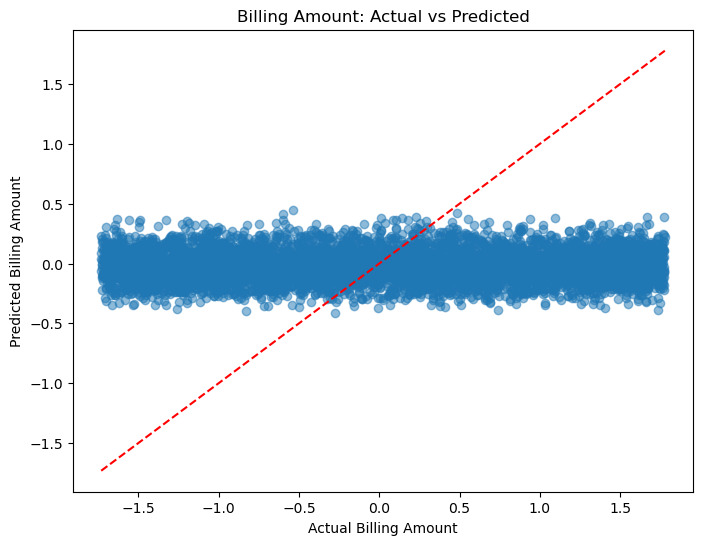

In [39]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression().fit(xtrain, ytrain)
prediction = clf.predict(xtest)

plt.figure(figsize=(8,6))
plt.scatter(ytest, prediction, alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.xlabel('Actual Billing Amount')
plt.ylabel('Predicted Billing Amount')
plt.title('Billing Amount: Actual vs Predicted')
plt.show()